# Simulation Script Loop Notebook

In [1]:
from agents import *
from environment import *
import numpy as np
from IPython.display import clear_output 
import time
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('font', size = 18)
plt.rc('text', usetex=True)

## Defaut Config

In [2]:
# Numbers
hv = 500         # n of HVs
av = 500         # n of AVs
N = 500           # n of Days

orig = '1'
dest = '9'

# Human Parameters
hv_err = 5        # error term on HV time perception ~N(0, hv_err)
hv_theta = .5     # rationality
hv_beta = .5      # prob of change route
hv_len = 3        # Memory lenth
hv_atis_bais = 0  # bias*prevTT + (1-bais)*memTT

# AV Parameters
av_err = 0
av_theta = 1
av_len = 1000     
av_atis_bias = 0
# no beta. all routes always concidered

# Square Network
roads = [Road('1', '2', 720, 20), Road('2', '3', 720, 12), Road('1', '4', 480, 15), Road('2', '5', 360, 12),
	Road('3', '6', 720, 12), Road('4', '5', 300, 10), Road('5', '6', 360, 12), Road('4', '7', 480, 15),
	Road('5', '8', 300, 10), Road('6', '9', 720, 30), Road('7', '8', 480, 15) ,Road('8', '9', 480, 15)]


## HV Loops

Loop 0/10: hv_theta=0.01
Loop 1/10: hv_theta=0.05
Loop 2/10: hv_theta=0.1
Loop 3/10: hv_theta=0.2
Loop 4/10: hv_theta=0.3
Loop 5/10: hv_theta=0.4
Loop 6/10: hv_theta=0.5
Loop 7/10: hv_theta=1
Loop 8/10: hv_theta=2
Loop 9/10: hv_theta=3


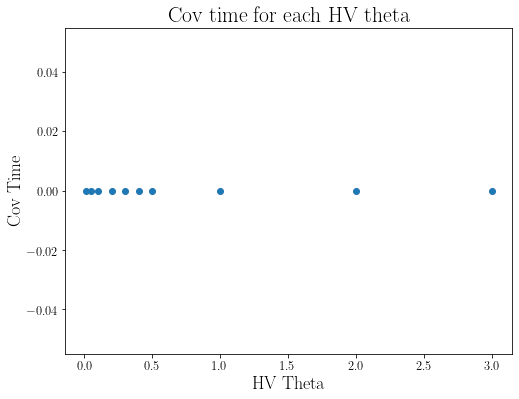

In [3]:
# hv theta loop
variable = [1, 3, 5, 10, 15, 50, 100]

loop = 0
lenth = len(variable)
tables = []

for hv_theta in variable:
    
    #clear_output(wait=True)
    print(f"Loop {loop}/{lenth}: {hv_theta=}")
    %run -i sim_script.py    # Run script in local this namespace
    
    tables.append(route_log)
    loop = loop + 1
    
#clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='HV Theta', ylabel='Cov Time',
       title='Cov time for each HV theta')
ax.scatter(variable, cov_time)
#fig.savefig('figs/hv_theta_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_theta = .5

In [ ]:
# hv beta loop
variable = list(np.linspace(0, 1, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for hv_beta in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='HV Beta', ylabel='Cov Time',
       title='Cov time for each HV Beta')
ax.scatter(variable, cov_time)
#fig.savefig('figs/hv_beta_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_beta = .5

In [ ]:
# hv err loop
variable = list(np.linspace(0, 10, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for hv_err in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='HV Error (+/-)', ylabel='Cov Time',
       title='Cov time for each HV Error')
ax.scatter(variable, cov_time)
#fig.savefig('figs/hv_err_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_err= 5

In [ ]:
# hv len loop
variable = list(np.linspace(0, 20, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for hv_len in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='HV Memory Lenth (Days)', ylabel='Cov Time',
       title='Cov time for each HV Memory Lenth')
ax.scatter(variable, cov_time)
#fig.savefig('figs/hv_len_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_len = 3

In [ ]:
# hv atis loop
variable = list(np.linspace(0, 1, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for hv_atis_bais in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='HV ATIS Bias', ylabel='Cov Time',
       title='Cov time for each HV ATIS Bias')
ax.scatter(variable, cov_time)
#fig.savefig('figs/hv_atais_bais.png', transparent=False, dpi=80, bbox_inches="tight")

hv_atis_bais = 0

## AV Loops

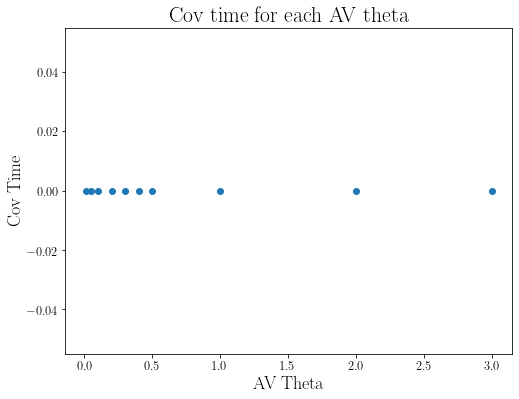

In [4]:
# av theta loop
variable = [0.01, 0.05, 0.1, .2, .3, .4, .5, 1, 2, 3]
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for av_theta in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='AV Theta', ylabel='Cov Time',
       title='Cov time for each AV theta')
ax.scatter(variable, cov_time)
#fig.savefig('figs/av_theta_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_theta = 1

In [ ]:
# av err 
variable = list(np.linspace(0, 10, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for av_err in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='AV Error (+/-)', ylabel='Cov Time',
       title='Cov time for each AV Error')
ax.scatter(variable, cov_time)
#fig.savefig('figs/av_err_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv_err= 0

In [2]:
# av atis loop
variable = list(np.linspace(0, 1, 10))
loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for av_atis_bais in variable:
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='AV ATIS Bias', ylabel='Cov Time',
       title='Cov time for each AV ATIS Bias')
ax.scatter(variable, cov_time)
#fig.savefig('figs/av_atais_bais.png', transparent=False, dpi=80, bbox_inches="tight")

hv_atis_bais = 0

NameError: name 'np' is not defined

In [3]:
# av err 
variable = list(np.linspace(0, 1000, 11))

loop = 0
lenth = len(variable)
var_len = range(len(variable))
tables = []
for ii in var_len:
    
    hv = variable[ii]
    av = variable[-ii-1]
    
    sta = time.time()
    %run -i sim_script.py 
    en = time.time()

     # Timing and ETA
    dif = en - sta
    togo = lenth - loop
    left = dif * togo
    mins = int(left//60)
    secs = int(left - mins*60)
    perc = int(100*loop/lenth)
    clear_output(wait=True) # WIP indicator
    print(f"Loop {loop}/{lenth} : {perc}% : ETA {mins}:{secs}, {variable=}")
    
    tables.append(route_log)
    loop = loop + 1
clear_output(wait=True)

# Plots
cov_time = []
day = 0
for table in tables:
    stdr0 = (table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    while stdr0 > 2:    
        day = day + 1
        stdr0 = ( table.loc[day, 'Route0' ] - table['Route0'].tail(50).mean() )/ table['Route0'].tail(50).std()
    cov_time.append(day)
    
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlabel='AV Error (+/-)', ylabel='Cov Time',
       title='Cov time for each AV Error')
ax.scatter(variable, cov_time)
#fig.savefig('figs/av_err_scatter.png', transparent=False, dpi=80, bbox_inches="tight")

hv = 500
av = 500

Loop 0/11 : 0% : ETA 0:0, variable=[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]


NameError: name 'route_log' is not defined

In [19]:
a = [1,2,3,4,5]
a[-1-1]

4

In [8]:
variable = list(np.linspace(0, 1000, 11))
variable

[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0]